  # A Sentiment Analysis on Hotels.ng 

A sentiment analysis carried out on the reviews left by hotel customers on hotels.ng to better advise hotel managements on how to improve their hospitality services for upward profit mobility. EDA carried out also provides insights as to whether or not these ratings are really the problem.

# Group A Team
1. Jikmyan Mangut Sunday
2. Leritmwa Danladi
3. Ayomide Oraegbu
4. Tshokelo Tumelo (Teaching Assistant TGB)

This project was carried out by first doing  a web-scraping on the hotels.ng site of hotel information for 2 states and the capital city. This was done using "Octoparse", a web-scraping tool that scrapes data in structured format instead of traditionally using beautiful soup, selenium and so on. The information gotten off of the site was then mergd into one dataframe for easy manipulation; with the column headers made to be in the same format prior to the marge(concatenation).
The cleaning of the data began with the changing of the values of the "Rating" and "Price" columns which were originally entered in string type to numeric type. The columns that were considered irrelevant to the whole process as well. It was observed that there were duplicates which had no ratings at all, neither were there any review texts with them. The columns with NaN entries were dropped for the time being pending when these prices for the duplicates would be used. For preprocessing the texts, we used Spacy, a Natural Language Processing tool to removepunctuation marks, extra spaces and stopwords as well. WordClouds were plotted for the highest occuring words in the textx, the cities with the highest number of hotels, indicating the most visited city. The hotels were also grouped by price, city as well. Also, the worlcloud for each city's text was plotted.

                        WEB-SCRAPPING
                        
Webscrapping of the hotels.ng site was performed with the Octoparse tool, a very powerful web-scrapping tool that scrappes data in a structured format.

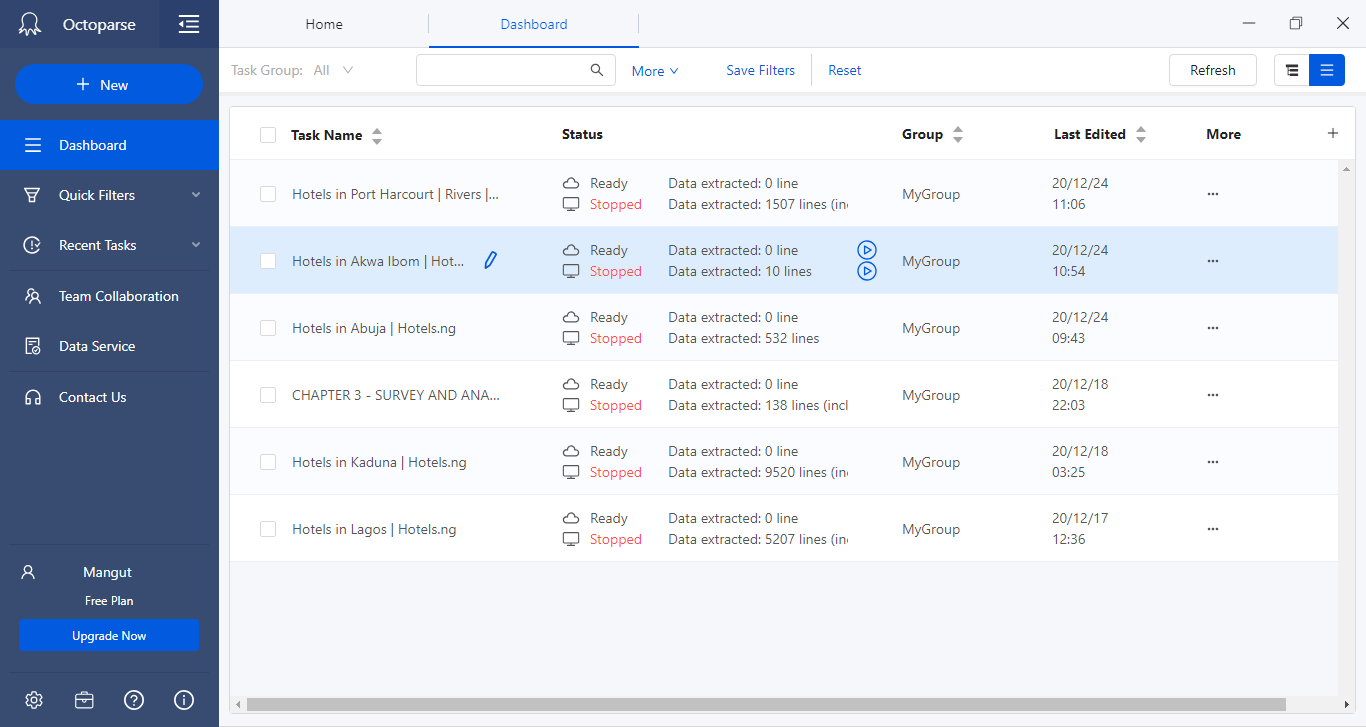

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# using pandas to read the csv files
df1 = pd.read_csv("https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Abuja%20Hotels.csv")
df2 = pd.read_csv('https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Lagos%20Hotels.csv')
df3 = pd.read_csv("https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Kaduna%20Hotels.csv")

Here we used the pandas .read_csv() function to read each of the files for the diffrent cities, Abuja, Lagos and Kaduna

In [3]:
# Renaming the 'Title' column as 'Hotel_Title'
df1 = df1.rename(columns = {'Title':'Hotel_Title','Review':'Review_Text'}, inplace = False)

We noticed that the table format/headings for the cities were not the same all through so we renamed them, the ones for Abuja specifically

In [4]:
#Dropping some columns that are irrelevant to the analysis
df2.drop('Number', axis = 1, inplace = True)
df2.drop('Like', axis = 1, inplace = True)
df3.drop('Number_of_Reviews', axis = 1, inplace = True)

There were columns in two of the three files we considered as irrelevant to our work and so we dropped them

In [5]:
df1['State'] = 'Abuja'
df2['State'] = 'Lagos'
df3['State'] = 'Kaduna'

A separate 'State' column was created for each city to indicate the state that each city is in

In [6]:
#combine all files in the list
combined_csv = pd.concat([df1,df2,df3])

Here the dataframes for the three cities were combined

In [7]:
combined_csv.head()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....","₦13,000\n ...",7.4 Very Good,Abuja
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,"₦5,000\n ...",7.3 Very Good,Abuja
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...","₦5,000\n ...",NaN,Abuja
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,"₦8,400\n ...",6.8 Very Good,Abuja
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,"₦9,000\n ...",7.4 Very Good,Abuja


In [8]:
duplicates = combined_csv[combined_csv.duplicated()]

Here, we can see the duplicate hotels in the entire dataset

In [9]:
duplicates

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
3299,Joe Dohinbo Hotel And Suites,https://hotels.ng/hotel/1438045-joe-dohinbo-ho...,", Lagos - 18, Badejo Street, Irawo Bus Stop Aj...",https://hotels.ng/hotels-in-lagos/,NaN,NaN,NaN,NaN,Lagos
3300,Exclusive Royal Hotel & Lounge LTD,https://hotels.ng/hotel/1438048-exclusive-roya...,"Isolo, Lagos - 24 Nusiratu Lasisi Street, Isolo",https://hotels.ng/hotels-in-lagos/isolo,Isolo,NaN,"₦12,000\n ...",NaN,Lagos
3301,Dazzle Pearl Homes,https://hotels.ng/hotel/1438054-dazzle-pearl-h...,"Lekki Phase 1, Lagos - No. 1 Wumego Crescent O...",https://hotels.ng/hotels-in-lagos/lekki-phase-1,Lekki Phase 1,NaN,"₦90,000\n ...",NaN,Lagos
3302,Dreams By DV8 Hotel,https://hotels.ng/hotel/1438057-dreams-by-dv8-...,"Surulere, Lagos - 30 Adelabu Street, Surulere",https://hotels.ng/hotels-in-lagos/surulere,Surulere,NaN,"₦36,750\n ...",NaN,Lagos
3303,De'Madera Hotel & Suites,https://hotels.ng/hotel/1438062-demadera-hotel...,"Ikeja, Lagos - No. 21 Eniola Adesanya Street O...",https://hotels.ng/hotels-in-lagos/ikeja,Ikeja,NaN,"₦15,000\n ...",NaN,Lagos
3304,Subzero Suites,https://hotels.ng/hotel/1438064-subzero-suites,"Lekki Phase 1, Lagos - No. 25, Daniyan Natalia...",https://hotels.ng/hotels-in-lagos/lekki-phase-1,Lekki Phase 1,NaN,"₦15,000\n ...",NaN,Lagos
3305,"La Bodega Luxury Serviced Apartment, Lagos",https://hotels.ng/hotel/1438066-la-bodega-luxu...,"Lekki Phase 1, Lagos - Kunle Ogunba Street, Of...",https://hotels.ng/hotels-in-lagos/lekki-phase-1,Lekki Phase 1,NaN,"₦25,000\n ...",NaN,Lagos
3306,"THE WESTWOOD LUXURY SERVICED APARTMENT, LAGOS",https://hotels.ng/hotel/1438068-the-westwood-l...,"Lekki Phase 1, Lagos - Sikiru Alade Oloko Cres...",https://hotels.ng/hotels-in-lagos/lekki-phase-1,Lekki Phase 1,NaN,"₦30,000\n ...",NaN,Lagos
3307,Luxe Osta Hotel And Suites,https://hotels.ng/hotel/1438069-luxe-osta-hote...,"Lekki, Lagos - No. 12, Yemi Adetayo Street, Be...",https://hotels.ng/hotels-in-lagos/lekki,Lekki,NaN,"₦13,000\n ...",NaN,Lagos
3308,Joe Dohinbo Hotel And Suites,https://hotels.ng/hotel/1438045-joe-dohinbo-ho...,", Lagos - 18, Badejo Street, Irawo Bus Stop Aj...",https://hotels.ng/hotels-in-lagos/,NaN,NaN,NaN,NaN,Lagos


In [10]:
duplicates['Rating'].isnull().sum()

11088

The number of NaNs Rating column for the duplicate hotels

In [11]:
duplicates['Review_Text'].isnull().sum()

11088

The number of NaNs in the Review_Text column for the duplicate hotels

In [12]:
duplicates['Price'].isnull().sum()

9392

The number of NaNs in the Price column for the duplicate hotels

In [13]:
# getting an overview of the columns of the dataset
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15259 entries, 0 to 9519
Data columns (total 9 columns):
Hotel_Title    15259 non-null object
Title_URL      15259 non-null object
Address        15259 non-null object
Address_URL    15259 non-null object
City           10897 non-null object
Review_Text    711 non-null object
Price          4337 non-null object
Rating         540 non-null object
State          15259 non-null object
dtypes: object(9)
memory usage: 1.2+ MB


This was so we could get an overview of what the data set looked in terms of the columns and the content in them; how many had all the information needed intact

In [14]:
combined_csv.describe()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
count,15259,15259,15259,15259,10897,711,4337,540,15259
unique,4121,4171,3803,274,348,690,522,20,3
top,Zanurakh Hotel And Suites,https://hotels.ng/hotel/1393407-zanurakh-hotel...,", Kaduna - No. 4 Bank Road, Kaduna North, L.G....",https://hotels.ng/hotels-in-kaduna/,Kaduna,My stay was okay....,"₦15,000\n ...",6.0 Very Good,Kaduna
freq,919,919,919,3680,2893,4,532,44,9520


This was to get a brief description of the columns; a little like what was done above -numerical entries specifically

In [15]:
# changing the string entries for the 'Price' column to numeric values
combined_csv['Price'] = pd.to_numeric(combined_csv.Price.str.replace('[^\d.]', ''), errors='coerce')

Seeing that the 'Price' and 'Rating' columns had string values, they were converted to numeric values

In [16]:
# making the same changes to the 'Rating' column
combined_csv['Rating'] = pd.to_numeric(combined_csv.Rating.str.replace('[^\d.]', ''), errors='coerce')

In [17]:
combined_csv.head()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...",5000.0,NaN,Abuja
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,9000.0,7.4,Abuja


In [18]:
# getting the mean of the 'Rating' column and rounding it off to one decimal point
mean_Rating = round(combined_csv['Rating'].mean(),1)

In [19]:
mean_Rating 

7.0

In [20]:
# dropping the NaN entries in any row
combined_csv.dropna(how ='any', axis = 0, inplace = True)

Here, the rows with NaN/null entries were dropped across all columns in the dataset. Seeing as we needed the ratings as they are, we let the rows with NaN values be dropped.

In [21]:
# saving the cleaned dataset as a csv file
combined_csv.to_csv('Hotels Combined.csv')

The cleaned, combined dataset was saved as a csv file.

In [22]:
# # in_cities = dataset.groupby(['Hotel_Title', 'City'])
# combined_csv['City'].value_counts().plot.bar()

In [23]:
#using the Groupby Function to aggregate the City and Hotel_Title columns
hotels_in_cities = combined_csv.groupby(['City' ,'Hotel_Title'])

Here, hotels were grouped by what part of whatever city they were located

In [24]:
hotels_in_cities.first()

Title_URL  \
City             Hotel_Title                                                                                
 Kubwa           Arlington Hotels                       https://hotels.ng/hotel/72822-arlington-hotels...   
 Lugbe           Blue-view Hotel                        https://hotels.ng/hotel/1013093-blue-view-hote...   
 Surulere,Lagos  BENESTAR SUITES                        https://hotels.ng/hotel/88812-benestar-suites-...   
 Victoria Island Integrity Hotel And Suites             https://hotels.ng/hotel/1012440-integrity-hote...   
Abuja            AMBIENCE HOTEL ABUJA                   https://hotels.ng/hotel/1015140-ambience-hotel...   
                 Bel Classcia (Former Durban Suites)    https://hotels.ng/hotel/1012461-durban-suites-...   
Agbara           De Oasis By Glinses Suites             https://hotels.ng/hotel/14611-de-oasis-byglins...   
Ajah             Ajaxbel Hotel                          https://hotels.ng/hotel/37612-ajaxbel-hotel-lagos   
                 Amador Suites                          https://hotels.ng/hotel/35955-amador-suites-lagos   
                 Fairmont Suites By Virgin Hospitality  https://hotels.ng/hotel/65629-fairmont-suites-...   
                 Lavalon Hotels And Suites              https://hotels.ng/hotel/18813-lavalon-hotels-a...   
                 Milestone Hotel                        https://hotels.ng/hotel/24482-milestone-hotel-...   
Ajao Estate      Coronia Hotel                          https://hotels.ng/hotel/67668-coronia-hotel-aj...   
                 Cynarisso Hotel Limited.               https://hotels.ng/hotel/18569-cynarisso-hotel-...   
                 D'luxx Villa And Suites                https://hotels.ng/hotel/1391736-dluxx-villa-an...   
                 De Next Centre Resorts Limited         https://hotels.ng/hotel/14823-de-next-centre-r...   
                 Golden Destiny Hotel Limited           https://hotels.ng/hotel/25874-golden-destiny-h...   
                 Hotel Ibis Royale                      https://hotels.ng/hotel/97413-hotel-ibis-royal...   
                 Isno Hotel Nigeria Limited             https://hotels.ng/hotel/19232-isno-hotel-niger...   
                 Silver Grandeur Hotel                  https://hotels.ng/hotel/88244-silver-grandeur-...   
                 Terrace Green Hotels                   https://hotels.ng/hotel/86787-terrace-green-ho...   
Akowonjo         De Santos Hotel                        https://hotels.ng/hotel/12273-de-santos-hotel-...   
Alakuko          Pacific Hotel And Suites 2             https://hotels.ng/hotel/51868-pacific-hotel-an...   
Amuwo-Odofin     Opera Classic Suite Limited            https://hotels.ng/hotel/73175-opera-classic-su...   
                 Sunfit International Limited           https://hotels.ng/hotel/43864-sunfit-internati...   
Anthony           Hotel 1960 (Prince Of Anthony)        https://hotels.ng/hotel/13458-prince-of-anthon...   
Anthony Village  Sylva Link Hotel Limted                https://hotels.ng/hotel/89545-sylva-link-hotel...   
Apapa            Becfom Hotels                          https://hotels.ng/hotel/93586-becfom-hotels-lagos   
                 Carliza Hotel                          https://hotels.ng/hotel/45722-carliza-hotel-lagos   
Apo              Barca Liga Hotels                      https://hotels.ng/hotel/1006513-barca-liga-hot...   
...                                                                                                   ...   
Wuse             Crown Princess Hotels                  https://hotels.ng/hotel/69764-crown-princess-h...   
                 Day Spring Hotel                       https://hotels.ng/hotel/45873-dayspring-hotel-...   
                 De Agape Regency Hotels Limited         https://hotels.ng/hotel/12181-agape-hotels-abuja   
                 Grand Ibro Hotel                       https://hotels.ng/hotel/34353-grand-ibro-hotel...   
                 Musada Luxury Suites                   https:/

A direct description of the groupby

In [25]:
#using the Groupby Function to aggregate the price and Hotel_Title columns
price_per_city = combined_csv.groupby(['Price','Hotel_Title'])

Here, hotels were grouped by their prices

In [26]:
price_per_city.first()

Title_URL  \
Price    Hotel_Title                                                                                             
2000.0   Ajaxbel Hotel                                       https://hotels.ng/hotel/37612-ajaxbel-hotel-lagos   
2200.0   Elegant Guest Inn                                   https://hotels.ng/hotel/92434-elegant-guest-in...   
2500.0   K Royal Hotel                                       https://hotels.ng/hotel/18988-k-royal-hotel-lagos   
3000.0   Alomars Lodge                                       https://hotels.ng/hotel/33626-alomars-lodge-lagos   
         Ovation Executive Hotel                             https://hotels.ng/hotel/92616-ovation-executiv...   
3150.0   Unilag Guest House                                  https://hotels.ng/hotel/62224-unilag-guest-hou...   
3500.0   Ced Lodge                                             https://hotels.ng/hotel/1009578-ced-lodge-lagos   
         Sikky Rolex Hotel                                   https://hotels.ng/hotel/26179-sikky-rolex-hote...   
4000.0   Bakky Fasal Guest House                             https://hotels.ng/hotel/1002408-bakky-fasal-ho...   
         Hotel C And M                                       https://hotels.ng/hotel/998636-hotel-c-and-m-l...   
         Ojei Golden Gate Hotel And Suite                    https://hotels.ng/hotel/43675-ojei-golden-gate...   
         Paradise Hotel And Garden                           https://hotels.ng/hotel/98641-holy-wood-hotel-...   
         Pedallo Luxury Inn                                  https://hotels.ng/hotel/58328-pedallo-luxury-i...   
4150.0   Tomaso King Palace 3                                https://hotels.ng/hotel/1008580-tomaso-king-pa...   
4275.0   Medallion Royal Suites                              https://hotels.ng/hotel/21551-medallion-royal-...   
4500.0   Becfom Hotels                                       https://hotels.ng/hotel/93586-becfom-hotels-lagos   
         Oak Hotel                                               https://hotels.ng/hotel/69943-oak-hotel-lagos   
         Queenset Guest House                                https://hotels.ng/hotel/1007165-queenset-guest...   
4800.0   Kolex Hotels                                         https://hotels.ng/hotel/93981-kolex-hotels-lagos   
5000.0   Bolad Hotel                                           https://hotels.ng/hotel/87331-bolad-hotel-lagos   
         Fairmont Suites By Virgin Hospitality               https://hotels.ng/hotel/65629-fairmont-suites-...   
         Larex International Hotel                           https://hotels.ng/hotel/65627-larex-internatio...   
         Libra Hotels Ltd.                                   https://hotels.ng/hotel/29486-libra-hotels-ltd...   
         Power Mike Hotels                                   https://hotels.ng/hotel/995346-power-mike-hote...   
5100.0   Moonshine Hotel                                     https://hotels.ng/hotel/85263-moonshine-hotel-...   
5250.0   Ehi Guest House                                     https://hotels.ng/hotel/26388-ehi-guest-house-...   
5500.0   Chadon Kitchen                                      https://hotels.ng/hotel/32241-chadon-kitchen-l...   
         Diamond Lodge Hotel                                 https://hotels.ng/hotel/84546-diamond-lodge-ho...   
         Jaftel Hotels                                       https://hotels.ng/hotel/1002084-jaftel-hotels-...   
         Klee Executive Hotel                                https://hotels.ng/hotel/68356-klee-executive-h...   
...                                                                                                        ...   
27200.0  Festival Hotel Festac Lagos (Formerly Golden Tu...  https://hotels.ng/hotel/49214-golden-tulip-fes...   
28000.0  Morning Side Suites And Spa                         https://hotels.ng/hotel/16246-morning-side-sui...   
29000.0  Newton Park Hotel                                   https://hotels.ng/hotel/35291-newton-park-hote... 

To begin prepping the review texts for a wordcloud, the 'Review_Text' entries(characters) were all change to lower case

In [27]:
combined_csv['Cleaned'] = combined_csv["Review_Text"].apply(lambda x: x.lower())

In [28]:
#importing string and regex libraries
import string
import re

In [29]:
# removing punctuations
combined_csv['Cleaned'] = combined_csv['Cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Here regex functions were used to remove the punctuations in the texts

In [30]:
# removing the spaces caused by the removal of punctations
combined_csv['Cleaned']=combined_csv['Cleaned'].apply(lambda x: re.sub(' +',' ',x))

Here regex was also used to remove any additonal spaces left where the punctuations used to be

In [31]:
for index,text in enumerate(combined_csv['Cleaned'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 i quite enjoyed my stay at the hotel i did not exactly have any issues checking in and ou
Review 2:
 the hotel was okay but the advertised wifi was not available the rooms were below standar
Review 3:
 my stay was nice warm place and lovely staff
Review 4:
 my stay was good
Review 5:
 i promised them i will do this review this is my 5th time here i most say i love the en


This codejust printed out five texts just so we can see that the preceeding processes worked 

In [32]:
# !pip install wordcloud

In [33]:
from wordcloud import WordCloud

In [34]:
# !pip install spacy
# !python -m spacy download en_core_web_sm    #downloading the spacy language model

In [35]:
#Importing the Spacy NLP library 
import spacy

Here we imported Spacy, an open source library and used it for pre-processing the texts

In [36]:
#loading the core english language model to the library
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [37]:
#Lemmatization converts words in the second or third forms to their first form variants
combined_csv['lemmatized']=combined_csv['Cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

Here, the lemmatization removed the stopwords

In [38]:
dataset_grouped=combined_csv[['Hotel_Title','lemmatized']].groupby(by='Hotel_Title').agg(lambda x:' '.join(x))
dataset_grouped.head()

,lemmatized
Hotel_Title,
"COMMAND GUEST HOUSE, KADUNA",stay wonderful hotel appreciate prompt service...
Hotel 1960 (Prince Of Anthony),stay weekend hotel wonderful welcome cheerfull...
Hotel Rosebud,patronize hotel close year disap
12th April Resorts Hotel,nice stay hotel perfect ought food
1st Forty Hotel,wow hotel totally amazing excellent staff clea...


Here, the finally state of the pre-processed texts can be seen, grouped by the hotels

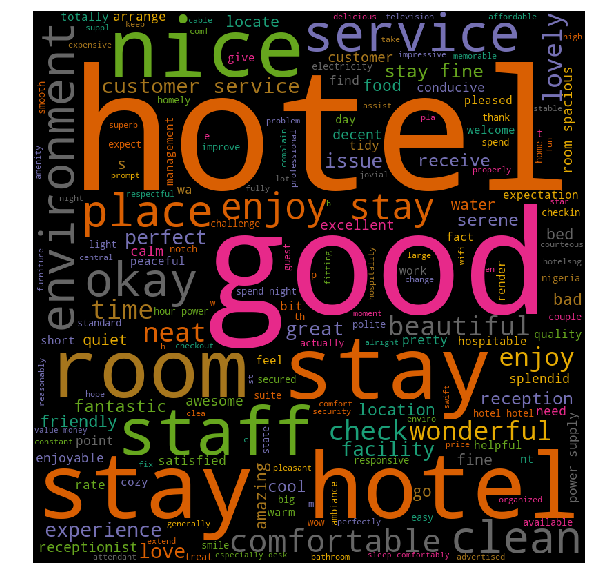

In [39]:
# a wordcloud of review texts from all the hotels
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(combined_csv['lemmatized'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

This is the wordcloud generated from the pre-processed texts from reviews

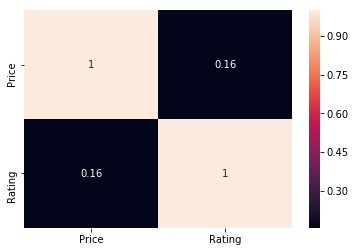

In [40]:
#visualising the price vs Rating on a heatmap
correl = combined_csv[['Price','Rating']]
correl.corr()
sns.heatmap(correl.corr(), annot = True)

This was to see if there was any correlation so to speak between prices of these hotels and the reviews left them by customers

In [41]:
#counting the occurence of the cities with hotels for the three states
combined_csv['City'].value_counts()

Ikeja                         51
Lekki                         30
Victoria Island               20
Surulere                      17
Wuse                          13
Yaba                          11
Festac                        11
Garki                         11
Lekki Phase 1                 10
Ajao Estate                    9
Ikoyi                          8
Kaduna North                   7
Maryland                       7
Maitama                        6
Gwarinpa                       6
Utako                          6
Gbagada                        5
Central Business District      5
Ajah                           5
Kaduna South                   5
Ebute Metta                    4
Ikotun                         3
Lekki Phase 2                  3
Egbeda                         3
Wuse 2                         2
Lekki                          2
Ikorodu                        2
Kaduna                         2
Abuja                          2
Wuye                           2
          

Wordcloud for the cities with hotels in them, using the three cities; Abuja, Lagos,Kaduna.

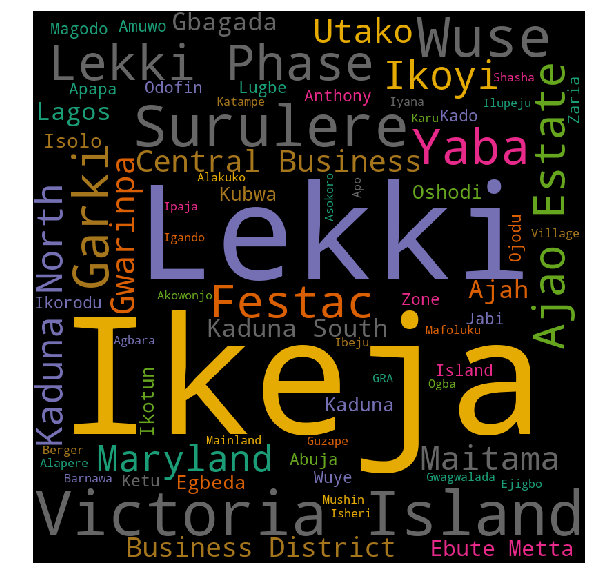

In [42]:
#wordcloud for the cities with hotels in them, using the three cities; Abuja, Lagos,Kaduna
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(combined_csv['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [43]:
#getting a count on the number of times a city appears
State_City = combined_csv.groupby(["State", "City"]).size().reset_index(name="Time")
State_City

,State,City,Time
0,Abuja,Kubwa,1
1,Abuja,Lugbe,1
2,Abuja,Abuja,2
3,Abuja,Apo,1
4,Abuja,Asokoro,1
5,Abuja,Central Business District,5
6,Abuja,Central Business District,1
7,Abuja,Garki,11
8,Abuja,Garki,1
9,Abuja,Garki 2,1


A concatenation of the three csv files for the cities were performed, here, we aggregated for each State individually in other to get insights on a State-wise basis.

In [44]:
#aggregating Abuja from the combined_csv for the hotel cities in Abuja
Hotel_Cities_Abuja = combined_csv.loc[combined_csv["State"] == "Abuja"]

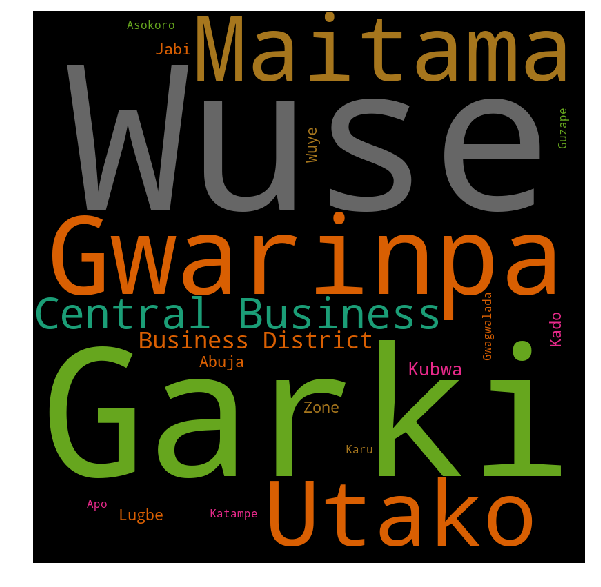

In [45]:
#wordcloud for the cities in Abuja showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Abuja['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [46]:
#aggregating from the combined_csv for the hotel cities in Lagos
Hotel_Cities_Lagos = combined_csv.loc[combined_csv["State"] == "Lagos"]

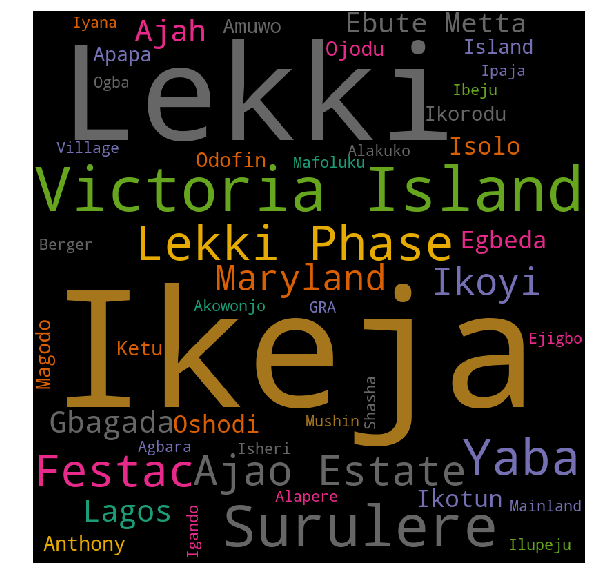

In [47]:
#wordcloud for the cities in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Lagos['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [48]:
#aggregating from the combined_csv for the hotel cities in Kaduna
Hotel_Cities_Kaduna = combined_csv.loc[combined_csv["State"] == "Kaduna"]

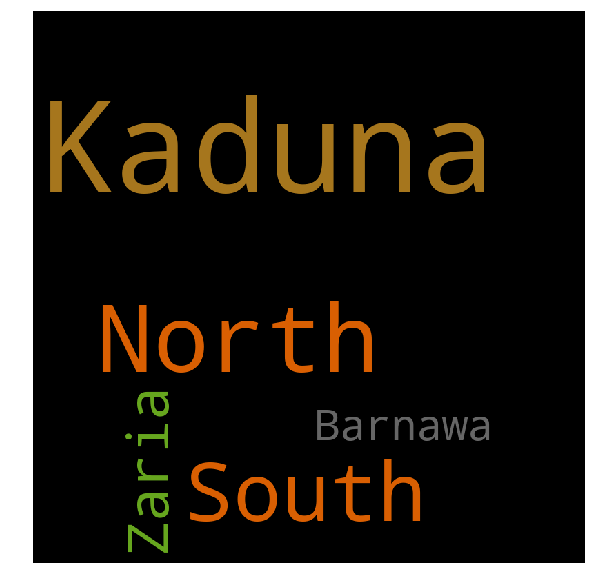

In [49]:
#wordcloud for the cities in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Kaduna['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

A concatenation of the three csv files for the cities were performed. Here, we aggregated for each State individually in other to get insights from the Review_Text on a State-wise basis.

In [50]:
#aggregating Abuja from the combined_csv for the Review_text in Abuja
Review_Text_Abuja = combined_csv.loc[combined_csv["State"] == "Abuja"]

In [51]:
Review_Text_Abuja.head(4)

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja,good stay my stay was very fine,good stay stay fine
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja,the room was reasonably tidy with a very big b...,room reasonably tidy big bed sleep comfortably...
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja,the hotel is beautiful and fully equipped hosp...,hotel beautiful fully equip hospitable respons...
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,9000.0,7.4,Abuja,my stay was okay at the hotel there were no is...,stay okay hotel issue stay receive


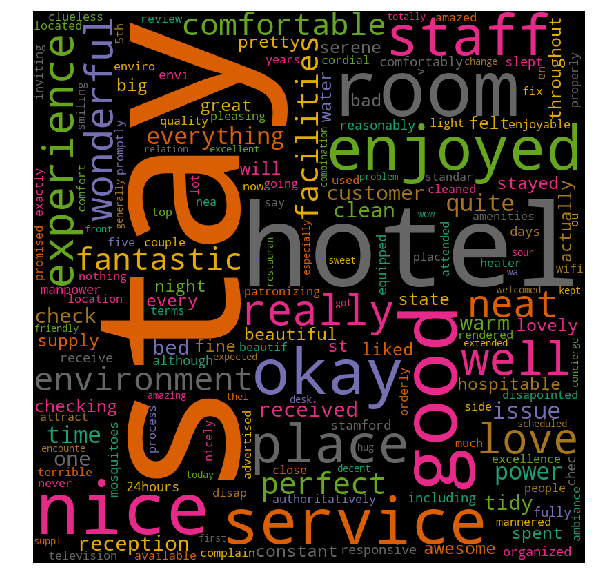

In [52]:
#wordcloud for the Review_text in Abuja showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Abuja['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [53]:
#aggregating Lagos from the combined_csv for the Review_text in Lagos
Review_Text_Lagos = combined_csv.loc[combined_csv["State"] == "Lagos"]
Review_Text_Lagos.head(2)

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
2,Beni Apartments,https://hotels.ng/hotel/55821-beni-apartments-...,"Victoria Island, Lagos - Plot 37 Ahmed Onibudo...",https://hotels.ng/hotels-in-lagos/victoria-island,Victoria Island,My stay at the hotel was a wonderful one. The ...,12000.0,7.4,Lagos,my stay at the hotel was a wonderful one the h...,stay hotel wonderful hotel nice place beautifu
3,Beni Hotels,https://hotels.ng/hotel/66239-beni-hotels-lagos,"Lagos Island, Lagos - 11/13 Wimo Onatere Stree...",https://hotels.ng/hotels-in-lagos/lagos-island,Lagos Island,I really didn't have any problem fitting in at...,7500.0,7.3,Lagos,i really didnt have any problem fitting in at ...,nt problem fitting hotel picture


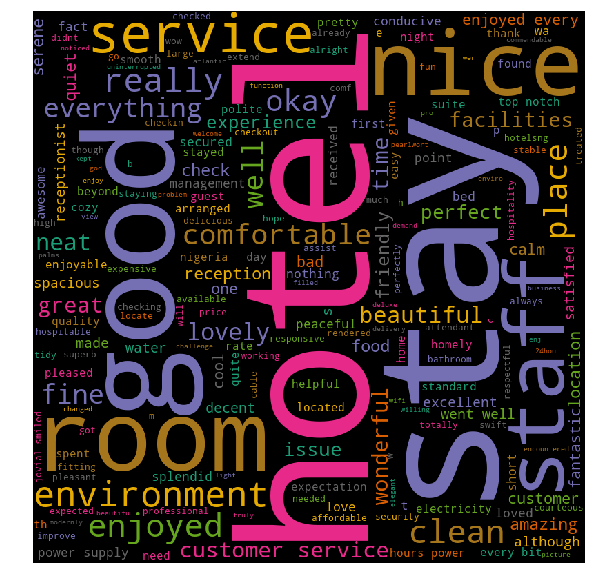

In [54]:
#wordcloud for the Review_text in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Lagos['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [55]:
#aggregating Kaduna from the combined_csv for the Review_text in Kaduna
Review_Text_Kaduna = combined_csv.loc[combined_csv["State"] == "Kaduna"]
Review_Text_Kaduna.head(2)

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
0,Hotel Seventeen,https://hotels.ng/hotel/44141-hotel-17-kaduna,"Kaduna, Kaduna - 6 Tafawa Balewa Way Lafiya Road",https://hotels.ng/hotels-in-kaduna/kaduna,Kaduna,Nice stay but the hotel did not have a shoe sh...,18313.0,6.8,Kaduna,nice stay but the hotel did not have a shoe sh...,nice stay hotel shoe shiner
1,Epitome Hotels,https://hotels.ng/hotel/23912-epitome-hotels-s...,"Kaduna South, Kaduna - 12/13 Ethiopia Street.",https://hotels.ng/hotels-in-kaduna/kaduna-south,Kaduna South,"I enjoyed my stay, the environment was cool....",9000.0,6.9,Kaduna,i enjoyed my stay the environment was cool,enjoy stay environment cool


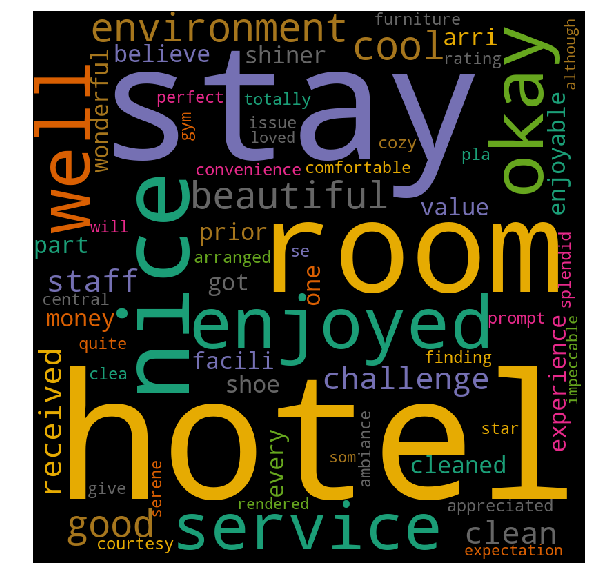

In [56]:
#wordcloud for the Review_text in Kaduna showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Kaduna['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [57]:
#creating the label
reviews_df = combined_csv
reviews_df.head(4)

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja,good stay my stay was very fine,good stay stay fine
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja,the room was reasonably tidy with a very big b...,room reasonably tidy big bed sleep comfortably...
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja,the hotel is beautiful and fully equipped hosp...,hotel beautiful fully equip hospitable respons...
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,9000.0,7.4,Abuja,my stay was okay at the hotel there were no is...,stay okay hotel issue stay receive


In [58]:
# create the label
reviews_df["is_bad_review"] = reviews_df["Rating"].apply(lambda x: 1 if x < 5 else 0)

In [59]:
# select only relevant columns
reviews_df = reviews_df[["Review_Text", "is_bad_review"]]
reviews_df.head()

,Review_Text,is_bad_review
0,"Good stay, my stay was very fine....",0
1,The room was reasonably tidy with a very big b...,0
3,The hotel is beautiful and fully equipped. Hos...,0
4,My stay was okay at the hotel. There were no i...,0
5,"My stay there was great. Wonderful staff, well...",0


In [60]:
#Reviews data is sampled in order to speed up computations.

reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state = 42)

In [61]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mangut\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [62]:
#We can do some feature engineering for our modelization part.
#Feature engineering

# add sentiment anaylsis columns
  
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["Review_Text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

We first start by adding sentiment analysis features because we can guess that customers reviews are highly linked to how they felt about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into accout the context of the sentences to determine the sentiment scores. For each text, Vader retuns 4 values:

a neutrality score
a positivity score
a negativity score
an overall score that summarizes the previous scores
We will integrate those 4 values as features in our dataset.

In [63]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["Review_Text"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["Review_Text"].apply(lambda x: len(x.split(" ")))

Next, we add some simple metrics for every text:

number of characters in the text

number of words in the text

In [64]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [65]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["Review_Text"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["Review_Text"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

The next step consist in extracting vector representations for every review. The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [66]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["Review_Text"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.

But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn't take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:

TF computes the classic number of times the word appears in the text
IDF computes the relative importance of this word which depends on how many texts the word can be found
We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

In [67]:
reviews_df.head()

,Review_Text,is_bad_review,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,...,doc2vec_vector_3,doc2vec_vector_4,word_and,word_at,word_good,word_hotel,word_my,word_stay,word_the,word_was
12,Nice place ....,0,0.0,0.417,0.583,0.4215,15,3,-0.064367,-0.087591,...,-0.013368,-0.076078,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
153,I had a nice stay in the hotel. The staff were...,0,0.0,0.682,0.318,0.6808,72,16,-0.026275,-0.019246,...,0.088782,0.047588,0.0,0.000000,0.000000,0.389820,0.000000,0.389820,0.755165,0.354693
99,"The hotel is very good. The environment, rooms...",0,0.0,0.671,0.329,0.7496,93,15,-0.008715,-0.041226,...,0.023204,0.071961,0.0,0.000000,0.767623,0.267210,0.267210,0.000000,0.517642,0.000000
96,My stay has been very good. I was scheduled to...,0,0.0,0.890,0.110,0.2724,93,20,-0.064536,0.090664,...,0.045395,0.035166,0.0,0.000000,0.649478,0.000000,0.452167,0.452167,0.000000,0.411421
31,I enjoyed my stay at the hotel. The reception ...,0,0.0,0.683,0.317,0.7574,93,18,-0.006927,-0.036778,...,-0.055761,-0.100309,0.0,0.298354,0.362097,0.252092,0.252092,0.252092,0.732534,0.229376


In [68]:
reviews_df.shape

(33, 21)

Exploratory data analysis
In order to have a better understanding of our data, 

let's explore it a little:

In [69]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    1.0
Name: is_bad_review, dtype: float64

Our dataset is highly balanced because 100% of our reviews are considered as positive ones. This information will be very unuseful for the modelling part.

Now let's print some wordclouds to have a glimpse at what kind of words apear in our reviews:

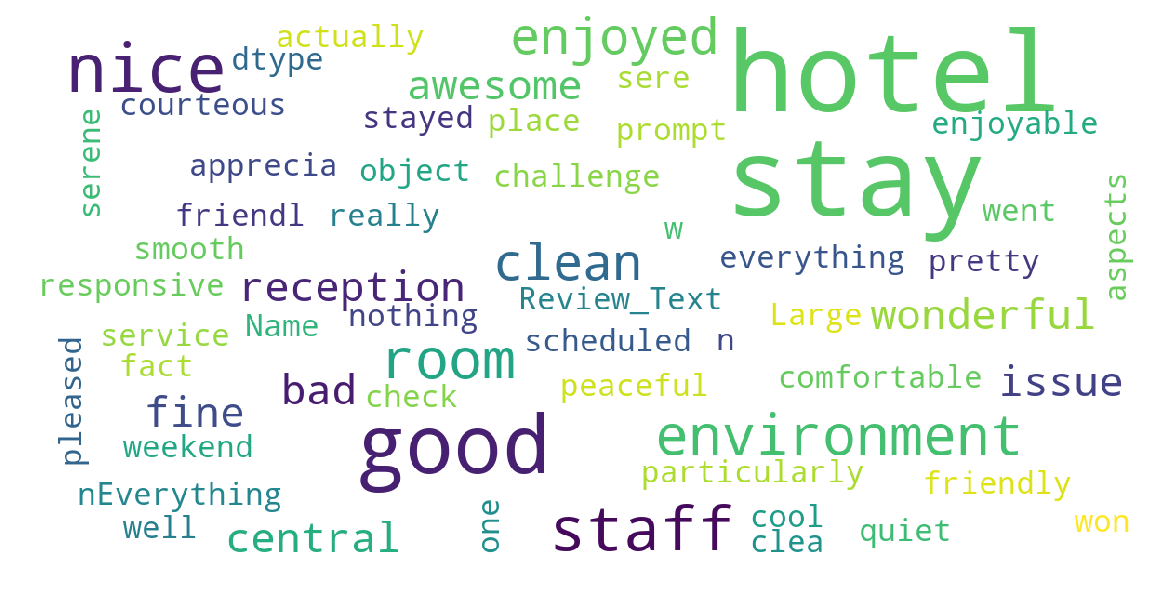

In [70]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["Review_Text"])


Most of the words are related to the hotels: room, staff,service etc. Some words are more related to the customer experience with the hotel stay: cool, wonderful, responsive, pretty, etc.

In [72]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review_Text", "pos"]].head(10)

,Review_Text,pos
14,"Clean rooms and responsive staff. Good hotel,...",0.709
34,"MY stay was not bad. Reception was good, clea...",0.566
1406,Nice and quiet environment with good service....,0.533
54,I enjoyed my stay. ...,0.524
507,I stayed a weekend at the hotel and it was won...,0.434
97,"This hotel is cool. The environment is serene,...",0.426
8,My stay was wonderful at the hotel. I apprecia...,0.422
289,"I enjoyed my stay at the hotel, everything we...",0.420
1382,"This is a good hotel, the environment was sere...",0.414
6,Very comfortable hotel. My stay was good....,0.375
